In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


In [2]:
def throw_coin(n_times):
    results = np.random.choice(['H','T'],n_times)
    return np.sum(results=='H')/float(n_times)

In [3]:
throw_coin(10)

0.29999999999999999

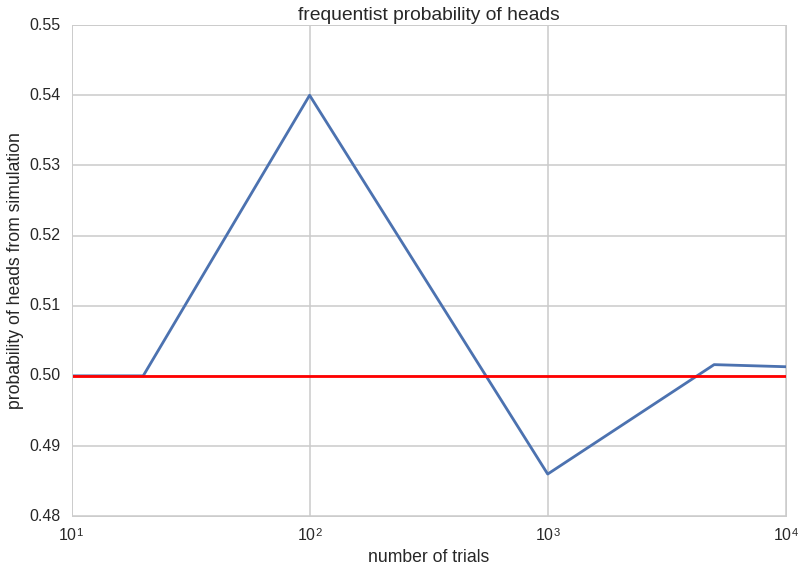

In [4]:
trials = [10,20,100,1000,5000,10000]
plt.plot(trials,[throw_coin(trial) for trial in trials])
plt.xscale("log")
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

# Election

In [5]:
predictwise = pd.read_csv('predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


In [6]:
predictwise.Votes.values.sum()

538

In [7]:
def plot_simulation(n_sim):
    simulations = np.random.uniform(size=(51,n_sim))
    print simulations
    plt.plot(simulations)
    
def print_obama_proba(df):
    df['proba'] = df.Obama.values.reshape(-1,1)*df.Votes.values.reshape(-1,1)
    
    print df

    
    

In [21]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #print obama_votes#summing over rows gives the total electoral votes for each simulation
    
    return obama_votes.sum(axis=0)

In [22]:
results = simulate_election(predictwise,10000)


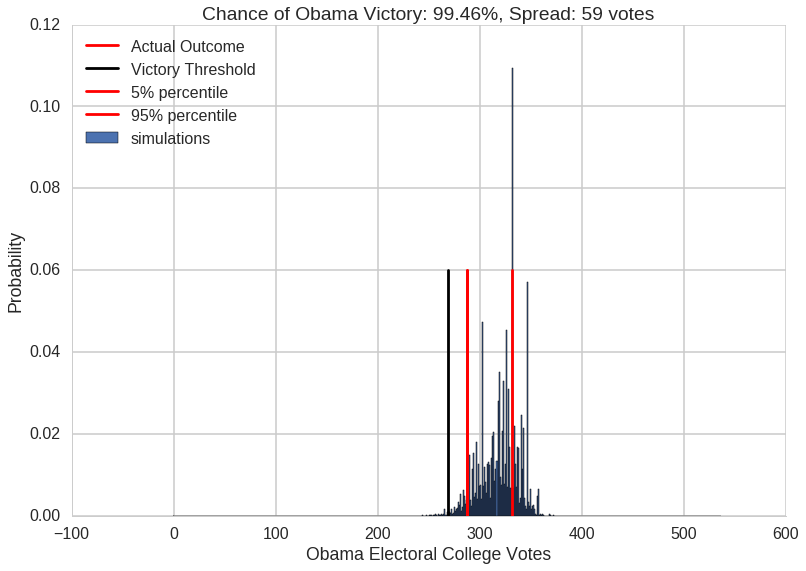

In [23]:
plt.hist(results, bins=np.arange(0, 538, 1), 
             label='simulations', align='left', normed=True
        )
plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
p05 = np.percentile(results, 5.)
p95 = np.percentile(results, 95.)
plt.axvline(p05, 0, .5, color='r', label='5% percentile')
plt.axvline(p05, 0, .5, color='r', label='95% percentile')
iq = int(p95 - p05)
pwin = ((results >= 269).mean() * 100)
plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
plt.legend(frameon=False, loc='upper left')
plt.xlabel("Obama Electoral College Votes")
plt.ylabel("Probability")
sns.despine()